# Polynomial Regression Assignment
---

You will continue to work on the medical insurance data from the previous assignment. 

You will now predict the insurance charge using Polynomial Regression, and you will compare the results with the results from the basic Linear Regression model.

## Q1: Imports + Data Loading

### 1.1 Import Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Load and explore data

In [22]:
# Load data

df = pd.read_csv("../Data/insurance.csv")

In [23]:
# EDA here

# Display the first five rows of the DataFrame to get a quick overview of the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# Summary information about the DataFrame to understand its structure and data types.
# (the number of entries, column names, non-null counts, and data types for each column)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
# Descriptive statistics for the numerical columns in the DataFrame

df.describe(include=["number"])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
# Calculate the correlation matrix for the numerical columns in the DataFrame

df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


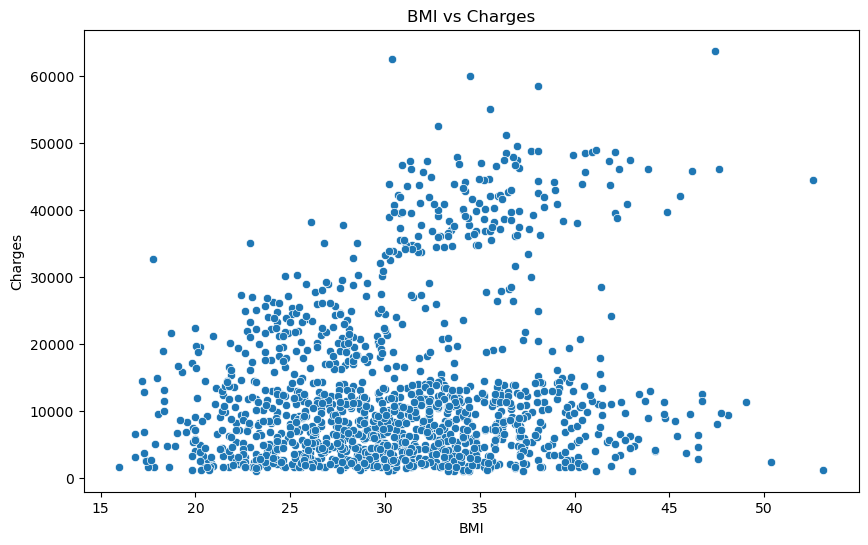

In [27]:
# Data Visualization

# scatter plot between BMI and Charges

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

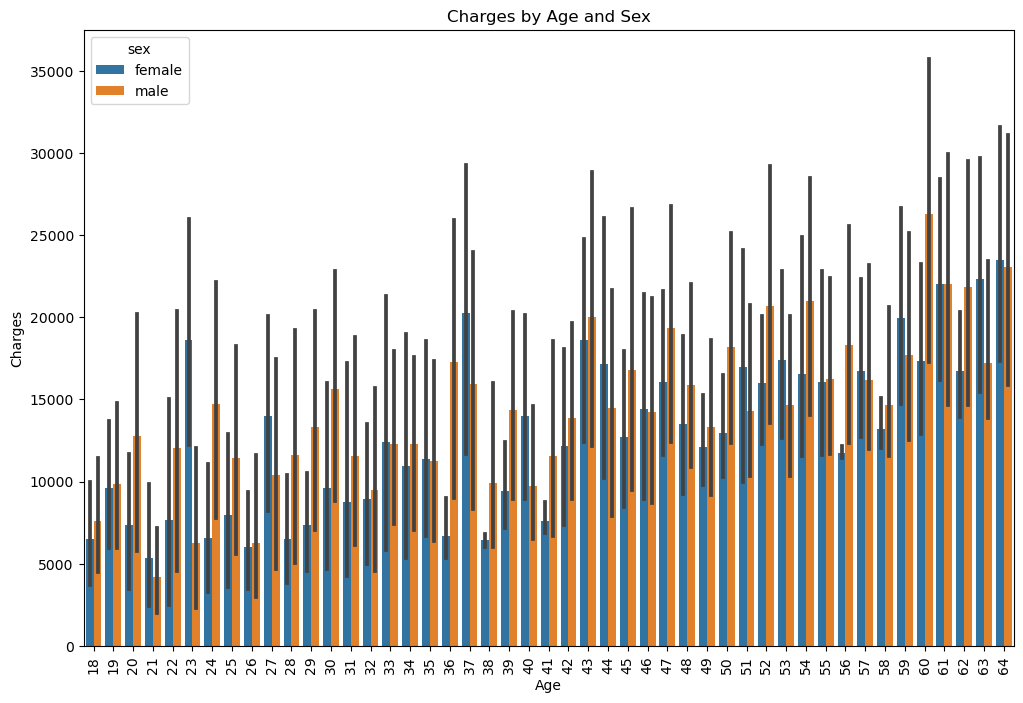

In [28]:
# Bar plot with 'age' on the x-axis, 'charges' on the y-axis, and bars separated by 'sex'

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="age", y="charges", hue="sex", dodge=True)
plt.xticks(rotation=90)
plt.title('Charges by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

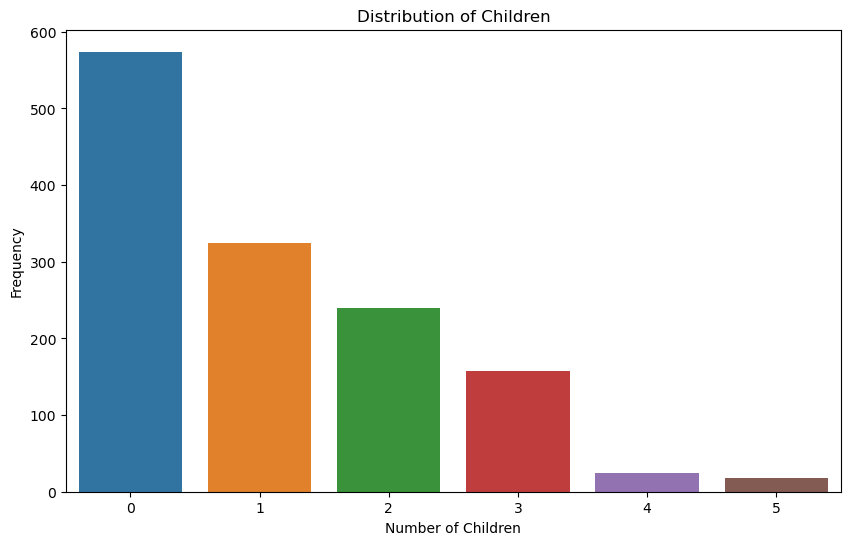

In [29]:
# Count plot of Children

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="children")
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

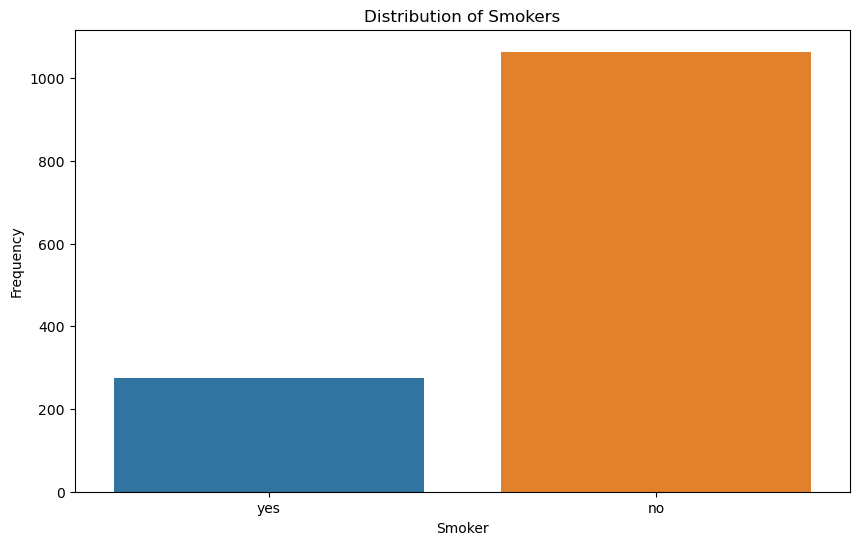

In [30]:
# Count plot of smokers

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="smoker")
plt.title('Distribution of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.show()

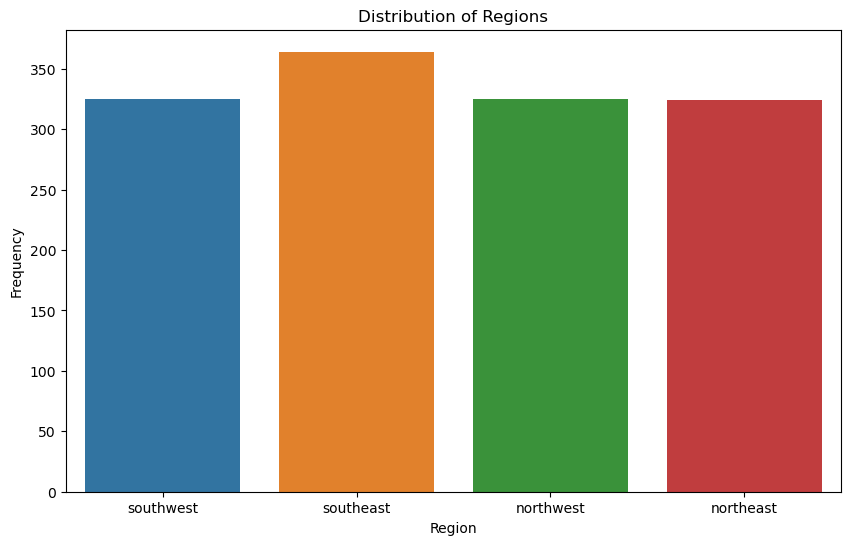

In [31]:
# Count plot of regions

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="region")
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.show()

## Q2: Prepare Data

### 2.1 Transform all the categorical columns into numerical format. You can choose the appropriate scikit-learn encoder.

In [32]:
# Answer here
# Import the OneHotEncoder from sklearn for encoding categorical variables

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder

encoder = OneHotEncoder(drop="first", sparse=False)

# Fit the encoder on the specified categorical columns and transform them into a one-hot encoded format

encoder_col = encoder.fit_transform(df[['sex', 'smoker', 'region']])

# Create a new DataFrame

new_df = pd.DataFrame(encoder_col, columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))

# Display the resulting one-hot encoded DataFrame

new_df

C:\Users\info\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1333,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,1.0


In [33]:
# Concatenate the original DataFrame 'df' with  'new_df'

df = pd.concat([df, new_df], axis=1)

# Display the updated DataFrame

df

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0.0,0.0,0.0,0.0,1.0


In [34]:
# Drop the original categorical columns ('sex', 'smoker', 'region') from the DataFrame as they have been replaced by one-hot encoded columns

df = df.drop(columns=["sex", "smoker", "region"], axis=1)

# Display the updated DataFrame

df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,0.0,1.0


### 2.2

Separate the independent features X from the target variable y.

In [35]:
# Answer here

# Separate the independent features X from the target variable y

X = df.drop("charges",axis=1)
y = df["charges"]

## Q3: Create Polynomial Features

### 3.1 Use scikit-learn's `PolynomialFeatures` tool to transform the feature set.

Choose a degree of 2.

In [36]:
# Answer here

# Initialize the PolynomialFeatures converter to create polynomial features of degree 2

poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Transform the original feature set 'X' into polynomial features

poly_feature = poly_converter.fit_transform(X)

### 3.2 What is the new shape of the feature set? And how many X features do you have in your dataset now?

In [37]:
print(f"Initial number of features: {X.shape[1]}")
print(f"Number of new features after transformation: {poly_feature.shape[1]}")

Initial number of features: 8
Number of new features after transformation: 44


## Q4: Train Model

Create and train a `LinearRegression` model.

**Remember to perform your train/test split using on the polynomial features, and not on the original X values.**

In [38]:
# Answer here
# Split the dataset into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(poly_feature,y,test_size=0.15,random_state=1)

In [39]:
# Initialize the Linear Regression model

model = LinearRegression()

# Fit and train the model to the training data (X_train and y_train)

model.fit(X_train,y_train)

LinearRegression()

In [40]:
# Make predictions on the test set (X_test)
y_pred = model.predict(X_test)

## Q5: Evaluate Model

### 5.1 Obtain the MAE, MSE, RMSE and R2 scores

In [41]:
# Answer here

# Calculate evaluation metrics to assess the model's performance on the test set.

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
R2_score = r2_score(y_test,y_pred)

print(f"The Mean Absolute Error : {MAE}")
print(f"The Mean Squared Error : {MSE}")
print(f"The Root Mean Squared Error : {RMSE}")
print(f"The R² score : {R2_score}")

The Mean Absolute Error : 2607.3264061925133
The Mean Squared Error : 20510436.23939392
The Root Mean Squared Error : 4528.844912270006
The R² score : 0.8553561336557451


### 5.2 Compare the RMSE and R2 scores from the polynomial model with the scores from the basic regression model

Which model performs better, and why?

Insert a markdown cell below to answer this question.

**Q1 : Compare the RMSE and R2 scores from the polynomial model with the scores from the basic regression model**

RMSE:

The polynomial model has a lower RMSE (4528.844912270006) compared to the basic model (6565.384612114564). This indicates that the polynomial model's predictions are closer to the actual values on average.

R² Score:

The polynomial model has a significantly higher R² score (0.8553561336557451) than the basic model (0.609856064343317). This means that the polynomial model explains about 85.5% of the variance in the target variable, whereas the basic model explains only about 61%.

**Q2 : Which model performs better?**

The polynomial regression model performs better than the basic regression model based on both RMSE and R² score. The lower RMSE indicates that the polynomial model makes more accurate predictions, and the higher R² score shows that it explains a greater proportion of the variance in the target variable.

## Q6: Find the Optimal Degree

Can we obtain better performance with a different polynomial degree?

### 6.1 Create a loop to explore the different RMSE scores (for both the train and test sets) for polynomial degrees between 1-10.

In [42]:
# Answer here

# Initialize lists to store degrees and corresponding RMSE scores for training and testing sets

degrees = []
rmse_train_scores = []
rmse_test_scores = []

# Loop through polynomial degrees from 1 to 10

for i in range(1, 11):
    
    # Create polynomial features for the current degree
    
    poly_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    # Split the dataset into training and testing sets
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.15, random_state=1)
    
    # Standardize the features to improve model performance
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the Linear Regression model
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Make predictions for both training and testing sets
    
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    # Calculate RMSE for training and testing predictions
    
    train_rmse = np.sqrt(mean_squared_error(train_pred, y_train))
    test_rmse = np.sqrt(mean_squared_error(test_pred, y_test))
    
    # Store the degree and corresponding RMSE scores
    
    degrees.append(i)
    rmse_train_scores.append(train_rmse)
    rmse_test_scores.append(test_rmse)

### 6.2 Print results

Create a pandas df to compare the train RMSE and the test RMSE for the degrees between 1-10.

In [43]:
# Answer here

# Create a DataFrame to summarize the RMSE scores for both training and testing sets

scores = pd.DataFrame({"Degree":degrees,"RMSE Train":rmse_train_scores,"RMSE Test":rmse_test_scores})

# Display the scores DataFrame to analyze the results

scores

,Degree,RMSE Train,RMSE Test
0,1,6046.651625,6.019780e+03
1,2,4763.666174,4.528845e+03
2,3,4578.008500,4.731731e+03
3,4,4294.045656,5.515831e+03
4,5,3762.493746,1.259785e+04
5,6,2874.022231,6.262475e+06
6,7,2314.761179,1.661148e+06
7,8,1343.150475,1.777318e+12
8,9,781.848876,1.081735e+12
9,10,480.143851,4.734401e+12


### 6.2 What is the most optimal degree?

Best degree is 2. Test RMSE starts to increase at 3.

**Optimal Degree: 2**

The RMSE for the test set starts to increase after degree 2. While the training RMSE continues to decrease, the test RMSE shows a significant rise starting at degree 3, indicating overfitting.

So the most optimal degree is 2, as it provides the lowest RMSE on the test set while maintaining a reasonable RMSE on the training set.

## Q7: Visualize Results

Create a graph to visualize the train and test RMSE scores for the different polynomial degrees.

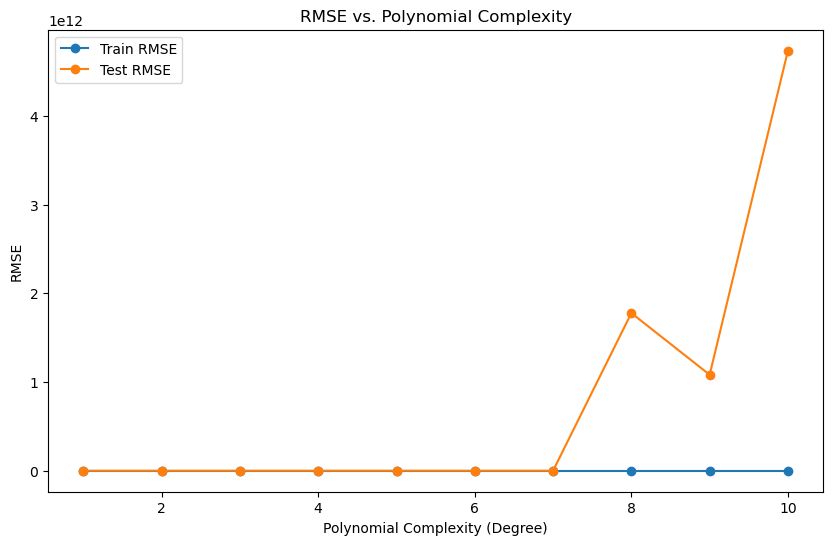

In [44]:
# Answer here

plt.figure(figsize=(10, 6))

# Plot the training RMSE scores against polynomial degrees

plt.plot(range(1, 11), rmse_train_scores, label='Train RMSE', marker='o')

# Plot the testing RMSE scores against polynomial degrees

plt.plot(range(1, 11), rmse_test_scores, label='Test RMSE', marker='o')

# The x-axis/y-axis labels

plt.xlabel("Polynomial Complexity (Degree)")
plt.ylabel("RMSE")

# Add a legend to differentiate between train and test RMSE

plt.legend()

# The title of the plot

plt.title("RMSE vs. Polynomial Complexity")

# Display the plot

plt.show()

# Great Job!